<a href="https://colab.research.google.com/github/kiraty-ai/Projectcars/blob/main/Input_data_md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Synchronizing with drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing and importing libraries for this notebook

In [2]:
!pip install pendulum
!pip install windrose
from windrose import WindroseAxes
import numpy as np
import pandas as pd
from os import listdir
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import pendulum
import matplotlib.pyplot as plt

On a first step, the data files are imported. From a .txt file with spaces as separation.\
\
Printing the names of the columns from the dataframe and their types. Printing a sample of the data, and plotting one columns to check visually the imported df.

10m_Speed[m/s]    float64
10m_Direction     float64
30m_Speed[m/s]    float64
30m_Direction     float64
50m_Speed[m/s]    float64
50m_Direction     float64
70m_Speed[m/s]    float64
70m_Direction     float64
85m_Speed[m/s]    float64
85m_Direction     float64
Park Power[KW]    float64
dtype: object
                     10m_Speed[m/s]  ...  Park Power[KW]
Date/Time                            ...                
2019-01-01 00:00:00           0.000  ...           786.0
2019-01-01 00:15:00           0.000  ...          1993.0
2019-01-01 00:30:00           0.000  ...          1672.0
2019-01-01 00:45:00           0.000  ...          2346.0
2019-01-01 01:00:00           0.000  ...          2775.0
...                             ...  ...             ...
2021-01-22 09:30:00           0.000  ...          -337.0
2021-01-22 09:45:00           0.012  ...          -344.0
2021-01-22 10:00:00           0.000  ...          -116.0
2021-01-22 10:15:00           1.207  ...           852.0
2021-01-22 10:30

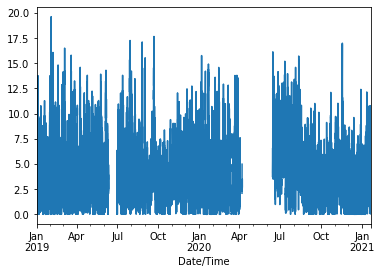

In [3]:
## INPUT OBSERVATION DATA FROM MAST .TXT FILE.

def input_data(path,path_wf,filename):
    file=path+path_wf+filename
    df = pd.read_csv(file, sep='\t', header=0)
    #df['date']=pd.to_datetime(df['date'],yearfirst=True,format='%Y%m%d%H')
    #df['date']=df['date']+ pd.DateOffset(hours=df['hors'])
    return df

filename='Park_data_UTC_+8.txt'
path_wf="China_forecast/China_one_case_100MW/"

target=input_data(path,path_wf,filename)

target.drop('Unnamed: 11', inplace=True, axis=1)

target['Date/Time']= pd.to_datetime(target['Date/Time'], format='%Y-%m-%d %H:%M:%S')
target.set_index('Date/Time', inplace=True)

print(target.dtypes)
print(target)

target['10m_Speed[m/s]'].plot()

In [4]:
## INPUT FORECAST DATA FROM ECMWF .TXT FILE.

def input_data(path,path_wf,filename):
    file=path+path_wf+filename
    df = pd.read_csv(file, sep='\t', header=0)
    #df['date']=pd.to_datetime(df['date'],yearfirst=True,format='%Y%m%d%H')
    #df['date']=df['date']+ pd.DateOffset(hours=df['hors'])
    return df

filename='ECMWF_[UTC_0].txt'
path_wf="China_forecast/China_one_case_100MW/forecast data/"

forecast_ecmwf=input_data(path,path_wf,filename)

forecast_ecmwf['Data_Time'] = forecast_ecmwf['Data_Time'].str.replace("_", " ")
forecast_ecmwf['Data_Time']= pd.to_datetime(forecast_ecmwf['Data_Time'], format='%Y-%m-%d %H:%M:%S')
#forecast_to_hour=pendulum.parse(forecast_gfs['Data_Time'])
forecast_to_hour=forecast_ecmwf['Data_Time'].dt.hour
forecast_ecmwf['hour']=forecast_ecmwf['Data_Time'].dt.hour
forecast_ecmwf['month']=forecast_ecmwf['Data_Time'].dt.month

forecast_ecmwf.set_index('Data_Time', inplace=True)

forecast_ecmwf.index=forecast_ecmwf.index+ pd.DateOffset(hours=8)

print(forecast_ecmwf["150m_Air_Density"].head())
print(forecast_ecmwf["150m_Temperature"].head())

#forecast_gfs.astype({'150m_Temperature': 'float64'})
#forecast_gfs.astype({'150m_Air_Density': 'float64'})
print(forecast_ecmwf.dtypes)

Data_Time
2019-10-01 08:00:00    1.111
2019-10-01 08:15:00    1.110
2019-10-01 08:30:00    1.108
2019-10-01 08:45:00    1.107
2019-10-01 09:00:00    1.105
Name: 150m_Air_Density, dtype: float64
Data_Time
2019-10-01 08:00:00    23.00
2019-10-01 08:15:00    23.36
2019-10-01 08:30:00    23.76
2019-10-01 08:45:00    24.19
2019-10-01 09:00:00    24.64
Name: 150m_Temperature, dtype: float64
10m_Direction                int64
10m_Speed[m/s]             float64
10m_Temperature            float64
Air_Pressure[Sea level]    float64
10m_Air_Density            float64
50m_Direction                int64
50m_Speed[m/s]             float64
50m_Temperature            float64
50m_Air_Density            float64
100m_Direction               int64
100m_Speed[m/s]            float64
100m_Temperature           float64
100m_Air_Density           float64
150m_Direction               int64
150m_Speed[m/s]            float64
150m_Temperature           float64
150m_Air_Density           float64
hour             

Text(0.5, 1.0, 'Air_Pressure[Sea level]')

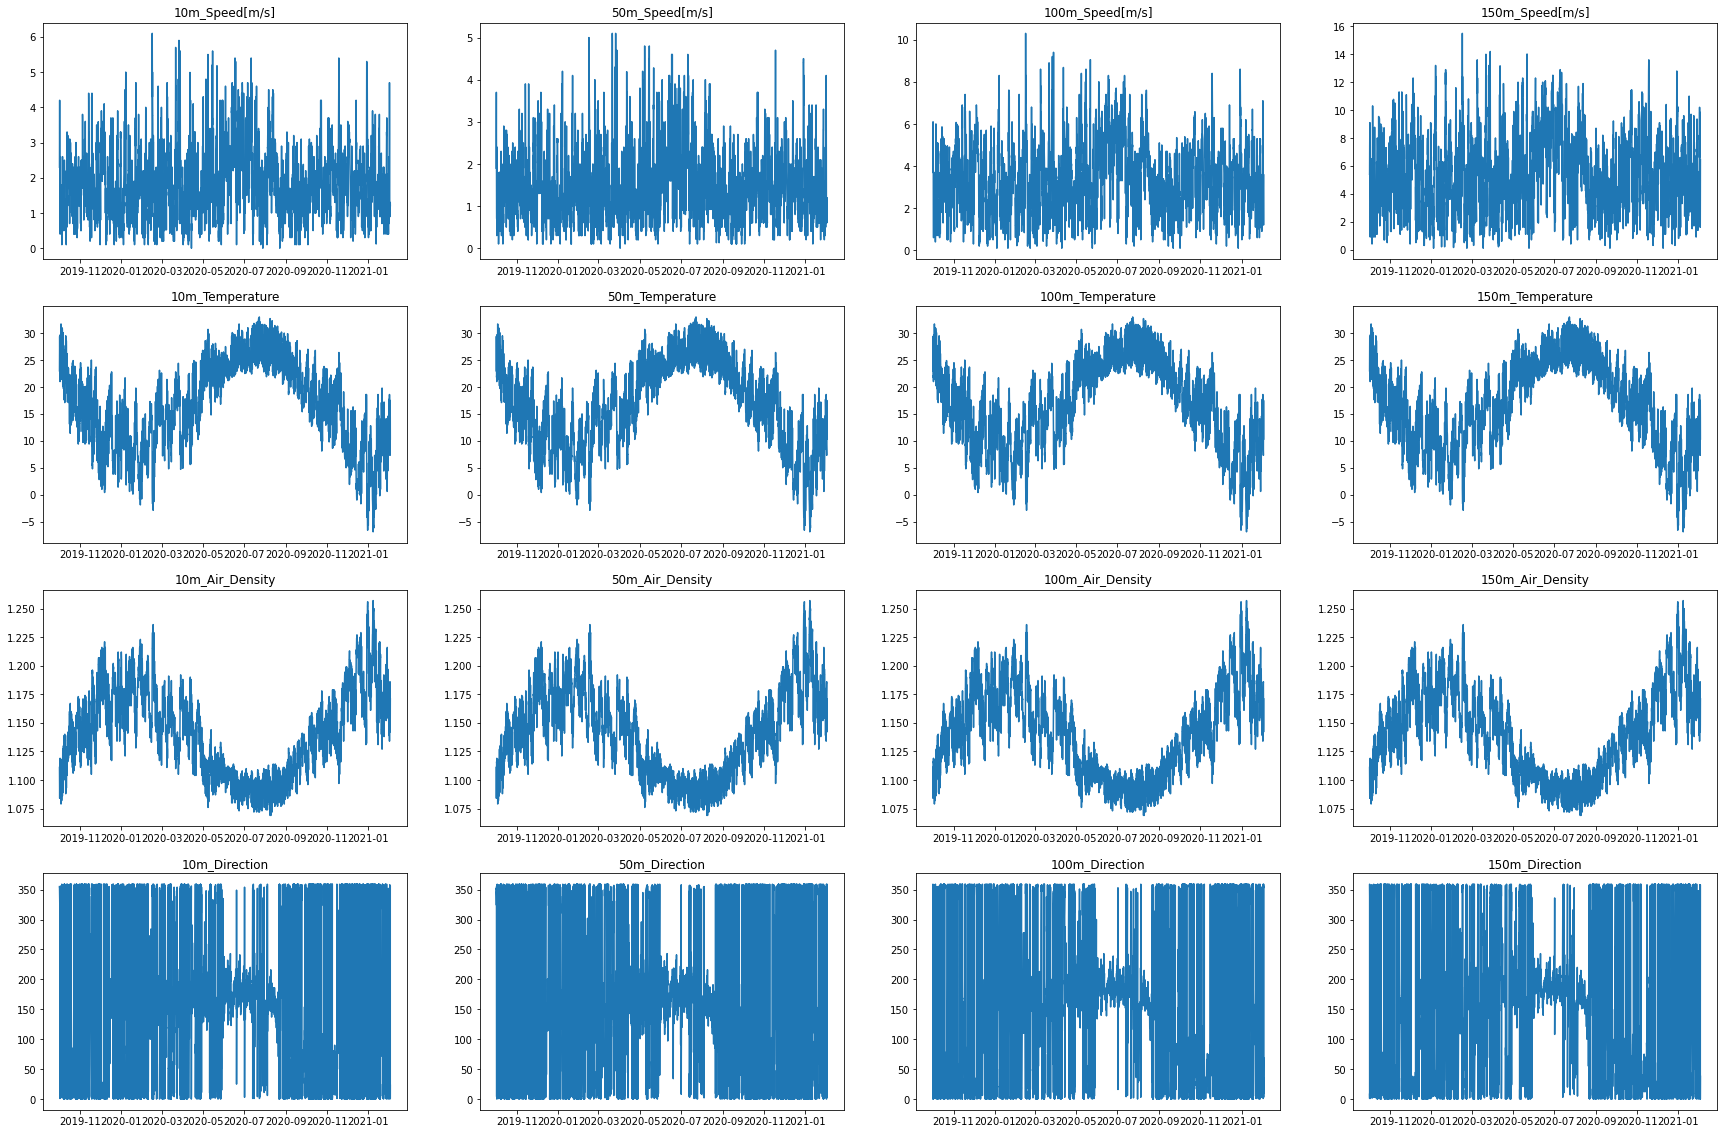

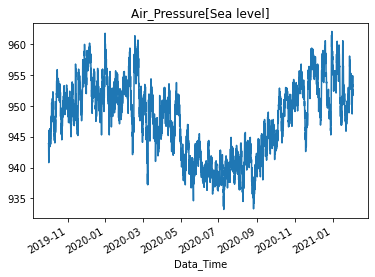

In [5]:
# Draw a scatter plot
#INCLUIR DATOS ESTADISTICOS!!

fig, axs = plt.subplots(4, 4,figsize=(30,20))

axs[0,0].plot(forecast_ecmwf.index,forecast_ecmwf['10m_Speed[m/s]'].values)
axs[0,0].set_title('10m_Speed[m/s]')
axs[0,1].plot(forecast_ecmwf.index,forecast_ecmwf['50m_Speed[m/s]'].values)
axs[0,1].set_title('50m_Speed[m/s]')
axs[0,2].plot(forecast_ecmwf.index,forecast_ecmwf['100m_Speed[m/s]'].values)
axs[0,2].set_title('100m_Speed[m/s]')
axs[0,3].plot(forecast_ecmwf.index,forecast_ecmwf['150m_Speed[m/s]'].values)
axs[0,3].set_title('150m_Speed[m/s]')
axs[1,0].plot(forecast_ecmwf.index,forecast_ecmwf['10m_Temperature'].values)
axs[1,0].set_title('10m_Temperature')
axs[1,1].plot(forecast_ecmwf.index,forecast_ecmwf['50m_Temperature'].values)
axs[1,1].set_title('50m_Temperature')
axs[1,2].plot(forecast_ecmwf.index,forecast_ecmwf['100m_Temperature'].values)
axs[1,2].set_title('100m_Temperature')
axs[1,3].plot(forecast_ecmwf.index,forecast_ecmwf['150m_Temperature'].values)
axs[1,3].set_title('150m_Temperature')
axs[2,0].plot(forecast_ecmwf.index,forecast_ecmwf['10m_Air_Density'].values)
axs[2,0].set_title('10m_Air_Density')
axs[2,1].plot(forecast_ecmwf.index,forecast_ecmwf['50m_Air_Density'].values)
axs[2,1].set_title('50m_Air_Density')
axs[2,2].plot(forecast_ecmwf.index,forecast_ecmwf['100m_Air_Density'].values)
axs[2,2].set_title('100m_Air_Density')
axs[2,3].plot(forecast_ecmwf.index,forecast_ecmwf['150m_Air_Density'].values)
axs[2,3].set_title('150m_Air_Density')
axs[3,0].plot(forecast_ecmwf.index,forecast_ecmwf['10m_Direction'].values)
axs[3,0].set_title('10m_Direction')
axs[3,1].plot(forecast_ecmwf.index,forecast_ecmwf['50m_Direction'].values)
axs[3,1].set_title('50m_Direction')
axs[3,2].plot(forecast_ecmwf.index,forecast_ecmwf['100m_Direction'].values)
axs[3,2].set_title('100m_Direction')
axs[3,3].plot(forecast_ecmwf.index,forecast_ecmwf['150m_Direction'].values)
axs[3,3].set_title('150m_Direction')

fig2 = plt.figure()
forecast_ecmwf["Air_Pressure[Sea level]"].plot()
plt.title('Air_Pressure[Sea level]')

In [6]:
## INPUT FORECAST DATA FROM GFS .TXT FILE.

def input_data(path,path_wf,filename):
    file=path+path_wf+filename
    df = pd.read_csv(file, sep='\t', header=0)
    #df['date']=pd.to_datetime(df['date'],yearfirst=True,format='%Y%m%d%H')
    #df['date']=df['date']+ pd.DateOffset(hours=df['hors'])
    return df

filename='GFS_[UTC_0].txt'
path_wf="China_forecast/China_one_case_100MW/forecast data/"

forecast_gfs=input_data(path,path_wf,filename)

forecast_gfs['Data_Time'] = forecast_gfs['Data_Time'].str.replace("_", " ")
forecast_gfs['Data_Time']= pd.to_datetime(forecast_gfs['Data_Time'], format='%Y-%m-%d %H:%M:%S')
#forecast_to_hour=pendulum.parse(forecast_gfs['Data_Time'])
forecast_to_hour=forecast_gfs['Data_Time'].dt.hour
forecast_gfs['hour']=forecast_gfs['Data_Time'].dt.hour
forecast_gfs['month']=forecast_gfs['Data_Time'].dt.month

forecast_gfs.set_index('Data_Time', inplace=True)

forecast_gfs.index=forecast_gfs.index+ pd.DateOffset(hours=8)

print(forecast_gfs["150m_Air_Density"].head())
print(forecast_gfs["150m_Temperature"].head())

#forecast_gfs.astype({'150m_Temperature': 'float64'})
#forecast_gfs.astype({'150m_Air_Density': 'float64'})
print(forecast_gfs.dtypes)


Data_Time
2019-10-01 08:00:00     1.11
2019-10-01 08:15:00     1.11
2019-10-01 08:30:00    1.109
2019-10-01 08:45:00    1.108
2019-10-01 09:00:00    1.106
Name: 150m_Air_Density, dtype: object
Data_Time
2019-10-01 08:00:00     20.5
2019-10-01 08:15:00    20.58
2019-10-01 08:30:00    20.79
2019-10-01 08:45:00    21.12
2019-10-01 09:00:00    21.55
Name: 150m_Temperature, dtype: object
10m_Direction                int64
10m_Speed[m/s]             float64
10m_Temperature            float64
Air_Pressure[Sea level]    float64
10m_Air_Density            float64
50m_Direction                int64
50m_Speed[m/s]             float64
50m_Temperature            float64
50m_Air_Density            float64
100m_Direction               int64
100m_Speed[m/s]            float64
100m_Temperature           float64
100m_Air_Density           float64
150m_Direction               int64
150m_Speed[m/s]            float64
150m_Temperature            object
150m_Air_Density            object
hour               

Text(0.5, 1.0, 'Air_Pressure[Sea level]')

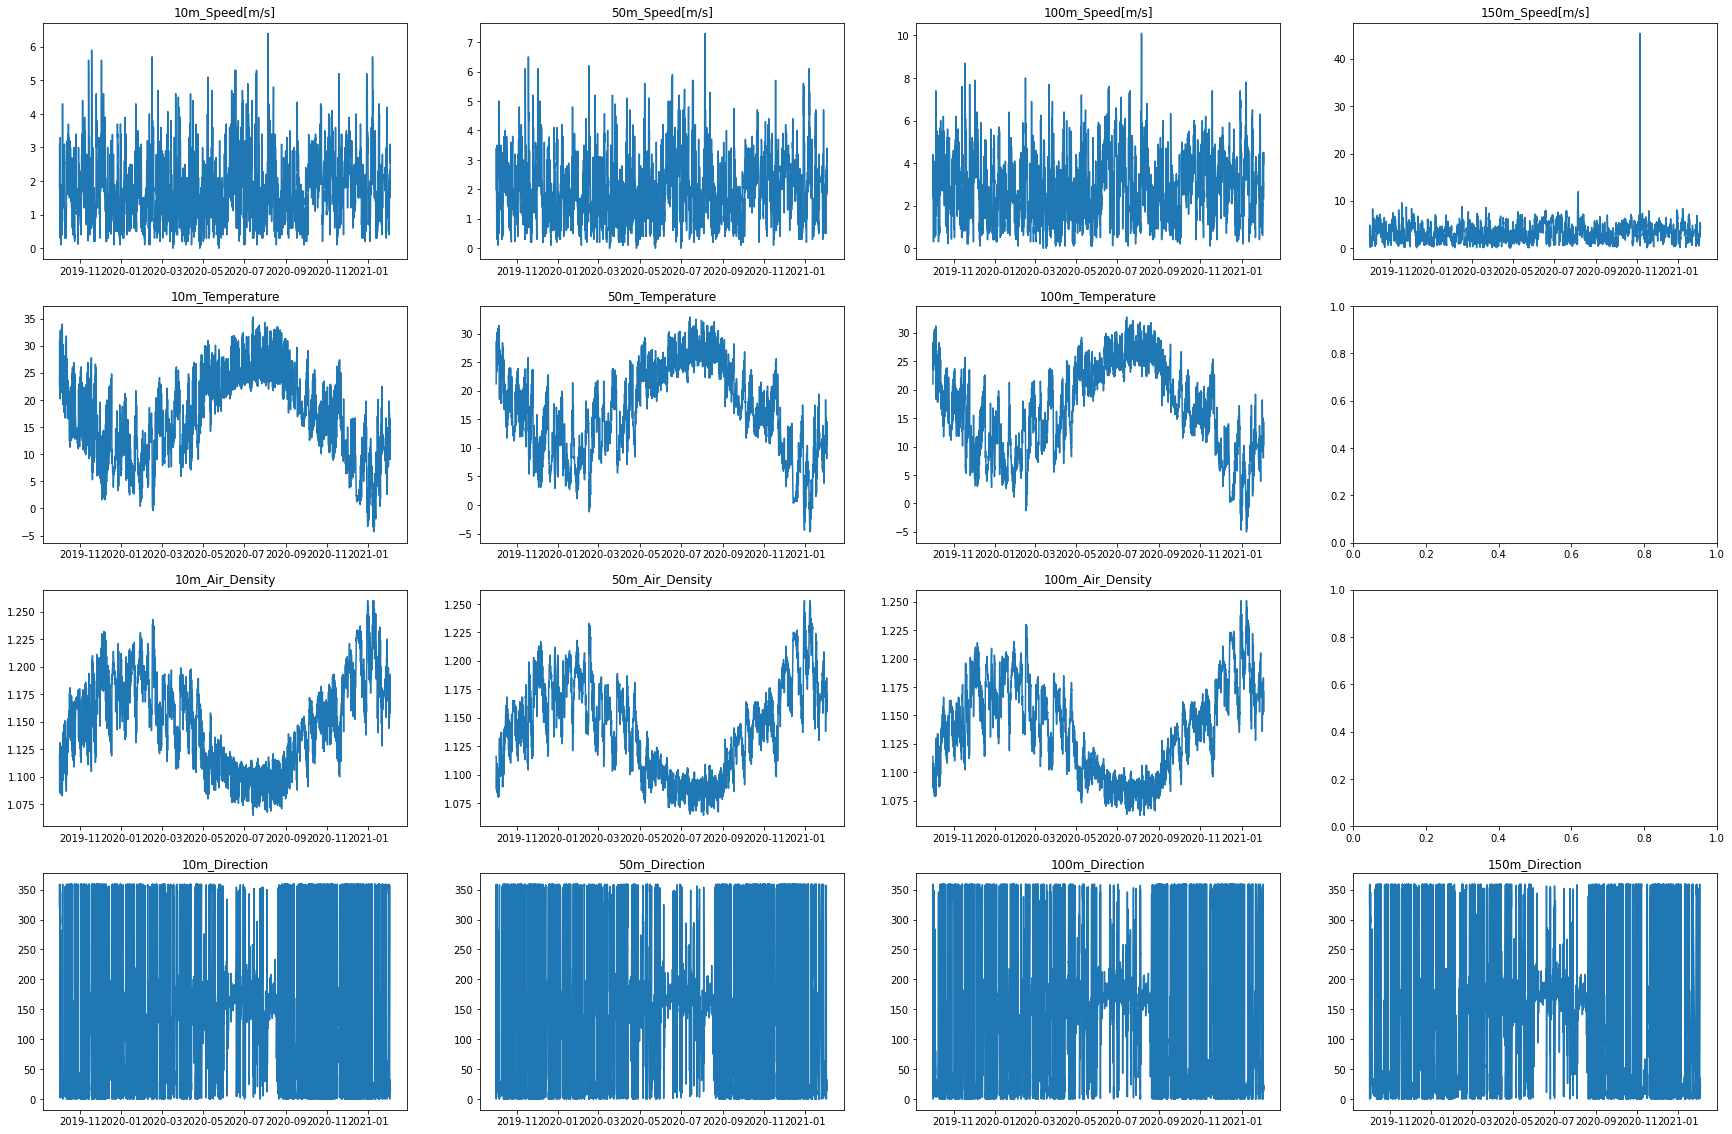

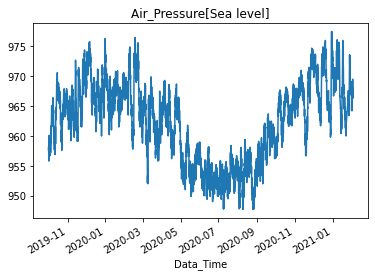

In [7]:
# Draw a scatter plot
#INCLUIR DATOS ESTADISTICOS!!

fig, axs = plt.subplots(4, 4,figsize=(30,20))

axs[0,0].plot(forecast_gfs.index,forecast_gfs['10m_Speed[m/s]'].values)
axs[0,0].set_title('10m_Speed[m/s]')
axs[0,1].plot(forecast_gfs.index,forecast_gfs['50m_Speed[m/s]'].values)
axs[0,1].set_title('50m_Speed[m/s]')
axs[0,2].plot(forecast_gfs.index,forecast_gfs['100m_Speed[m/s]'].values)
axs[0,2].set_title('100m_Speed[m/s]')
axs[0,3].plot(forecast_gfs.index,forecast_gfs['150m_Speed[m/s]'].values)
axs[0,3].set_title('150m_Speed[m/s]')
axs[1,0].plot(forecast_gfs.index,forecast_gfs['10m_Temperature'].values)
axs[1,0].set_title('10m_Temperature')
axs[1,1].plot(forecast_gfs.index,forecast_gfs['50m_Temperature'].values)
axs[1,1].set_title('50m_Temperature')
axs[1,2].plot(forecast_gfs.index,forecast_gfs['100m_Temperature'].values)
axs[1,2].set_title('100m_Temperature')
axs[2,0].plot(forecast_gfs.index,forecast_gfs['10m_Air_Density'].values)
axs[2,0].set_title('10m_Air_Density')
axs[2,1].plot(forecast_gfs.index,forecast_gfs['50m_Air_Density'].values)
axs[2,1].set_title('50m_Air_Density')
axs[2,2].plot(forecast_gfs.index,forecast_gfs['100m_Air_Density'].values)
axs[2,2].set_title('100m_Air_Density')
axs[3,0].plot(forecast_gfs.index,forecast_gfs['10m_Direction'].values)
axs[3,0].set_title('10m_Direction')
axs[3,1].plot(forecast_gfs.index,forecast_gfs['50m_Direction'].values)
axs[3,1].set_title('50m_Direction')
axs[3,2].plot(forecast_gfs.index,forecast_gfs['100m_Direction'].values)
axs[3,2].set_title('100m_Direction')
axs[3,3].plot(forecast_gfs.index,forecast_gfs['150m_Direction'].values)
axs[3,3].set_title('150m_Direction')

fig2 = plt.figure()
forecast_gfs["Air_Pressure[Sea level]"].plot()
plt.title('Air_Pressure[Sea level]')


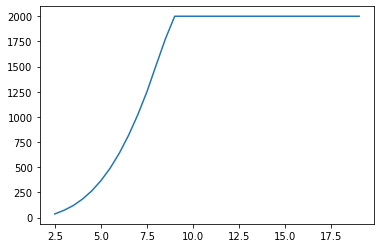

In [8]:
## INPUT POWER CURVE DATA FROM .TXT FILE.

def input_data(path,path_wf,filename):
    file=path+path_wf+filename
    df = pd.read_csv(file, sep='\t', header=0)
    #df['date']=pd.to_datetime(df['date'],yearfirst=True,format='%Y%m%d%H')
    #df['date']=df['date']+ pd.DateOffset(hours=df['hors'])
    return df

filename='WT115-2.0MW_Power Curve.txt'
path_wf="China_forecast/China_one_case_100MW/Turbine Type/"

power_curve=input_data(path,path_wf,filename)

power_curve['2000'].plot()

DatetimeIndex(['2019-10-01 08:00:00'], dtype='datetime64[ns]', name='Data_Time', freq=None)
DatetimeIndex(['2021-01-22 10:30:00'], dtype='datetime64[ns]', name='Date/Time', freq=None)
(array([38640, 38641, 38642, ..., 44997, 44998, 44999]),)
DatetimeIndex(['2020-11-06 18:45:00', '2020-11-06 19:00:00',
               '2020-11-06 19:15:00', '2020-11-06 19:30:00',
               '2020-11-06 19:45:00', '2020-11-07 20:00:00',
               '2020-11-07 20:15:00', '2020-11-07 20:30:00',
               '2020-11-07 20:45:00', '2020-11-07 21:00:00'],
              dtype='datetime64[ns]', name='Data_Time', freq=None)
DatetimeIndex(['2020-11-06 18:45:00', '2020-11-06 19:00:00',
               '2020-11-06 19:15:00', '2020-11-06 19:30:00',
               '2020-11-06 19:45:00', '2020-11-06 20:00:00',
               '2020-11-06 20:15:00', '2020-11-06 20:30:00',
               '2020-11-06 20:45:00', '2020-11-06 21:00:00'],
              dtype='datetime64[ns]', name='Date/Time', freq=None)
            

Text(0.5, 1.0, '100m_Speed[m/s]')

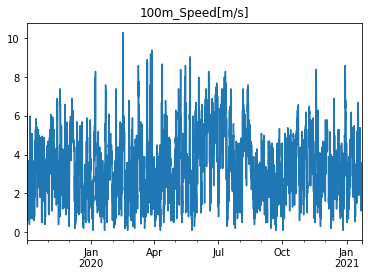

In [9]:
    ##ECMWF

    start_date = max([target.head(1).index, forecast_ecmwf.head(1).index])
    end_date = min([target.tail(1).index, forecast_ecmwf.tail(1).index])

    print(start_date)
    print(end_date)

    ECMWF= forecast_ecmwf.loc[start_date[0]:end_date[0]]
    OBS= target.loc[start_date[0]:end_date[0]]

    difference=np.where(ECMWF.index[0:45000] != OBS.index[0:45000])
    print(difference)
    print(ECMWF.index[38635:38645])
    print(OBS.index[38635:38645])

    power = pd.Series(OBS['Park Power[KW]'], name="Park Power[KW]")
    ECMWF = pd.concat([ECMWF, power],axis=1, ignore_index=False, sort=False)

    print(ECMWF)
    print(OBS)

    find_high=np.where(ECMWF['150m_Speed[m/s]']>=12)
    print(ECMWF.index[find_high])

    fig = plt.figure()
    ECMWF["100m_Speed[m/s]"].plot()
    plt.title('100m_Speed[m/s]')

DatetimeIndex(['2019-10-01 08:00:00'], dtype='datetime64[ns]', name='Data_Time', freq=None)
DatetimeIndex(['2021-01-22 10:30:00'], dtype='datetime64[ns]', name='Date/Time', freq=None)
(array([ 2256,  2257,  2258, ..., 44997, 44998, 44999]),)
DatetimeIndex(['2019-10-24 19:30:00', '2019-10-24 19:45:00',
               '2019-10-25 20:00:00', '2019-10-25 20:15:00',
               '2019-10-25 20:30:00', '2019-10-25 20:45:00'],
              dtype='datetime64[ns]', name='Data_Time', freq=None)
DatetimeIndex(['2019-10-24 19:30:00', '2019-10-24 19:45:00',
               '2019-10-24 20:00:00', '2019-10-24 20:15:00',
               '2019-10-24 20:30:00', '2019-10-24 20:45:00'],
              dtype='datetime64[ns]', name='Date/Time', freq=None)
                     10m_Direction  10m_Speed[m/s]  ...  month  Park Power[KW]
2019-10-01 08:00:00          318.0            1.80  ...   10.0         12077.0
2019-10-01 08:15:00          319.0            1.81  ...   10.0          8763.0
2019-10-01 08:30:00

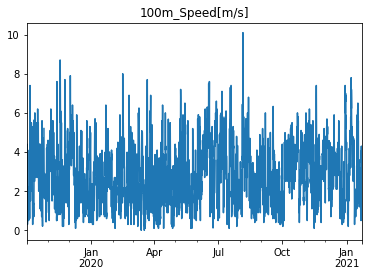

DatetimeIndex(['2020-11-05 00:00:00', '2020-11-05 00:15:00',
               '2020-11-05 00:30:00', '2020-11-05 00:45:00',
               '2020-11-05 01:00:00', '2020-11-05 01:15:00',
               '2020-11-05 01:30:00', '2020-11-05 01:45:00',
               '2020-11-05 02:00:00', '2020-11-05 02:15:00',
               '2020-11-05 02:30:00', '2020-11-05 02:45:00',
               '2020-11-05 03:00:00', '2020-11-05 03:15:00',
               '2020-11-05 03:30:00', '2020-11-05 03:45:00',
               '2020-11-05 04:00:00'],
              dtype='datetime64[ns]', freq=None)


In [10]:
    ##GFS   
    start_date = max([target.head(1).index, forecast_gfs.head(1).index])
    end_date = min([target.tail(1).index, forecast_gfs.tail(1).index])

    print(start_date)
    print(end_date)

    GFS= forecast_gfs.loc[start_date[0]:end_date[0]]
    OBS= target.loc[start_date[0]:end_date[0]]

    difference=np.where(GFS.index[0:45000] != OBS.index[0:45000])
    print(difference)
    print(GFS.index[2254:2260])
    print(OBS.index[2254:2260])

    power = pd.Series(OBS['Park Power[KW]'], name="Park Power[KW]")
    GFS = pd.concat([GFS, power],axis=1, ignore_index=False, sort=False)

    print(GFS)
    print(OBS)

    fig = plt.figure()
    GFS["100m_Speed[m/s]"].plot()
    plt.title('100m_Speed[m/s]')
    plt.show()

    find_high=np.where(GFS['150m_Speed[m/s]']>=12)
    print(GFS.index[find_high])

Text(0.5, 1.0, '85m_Direction')

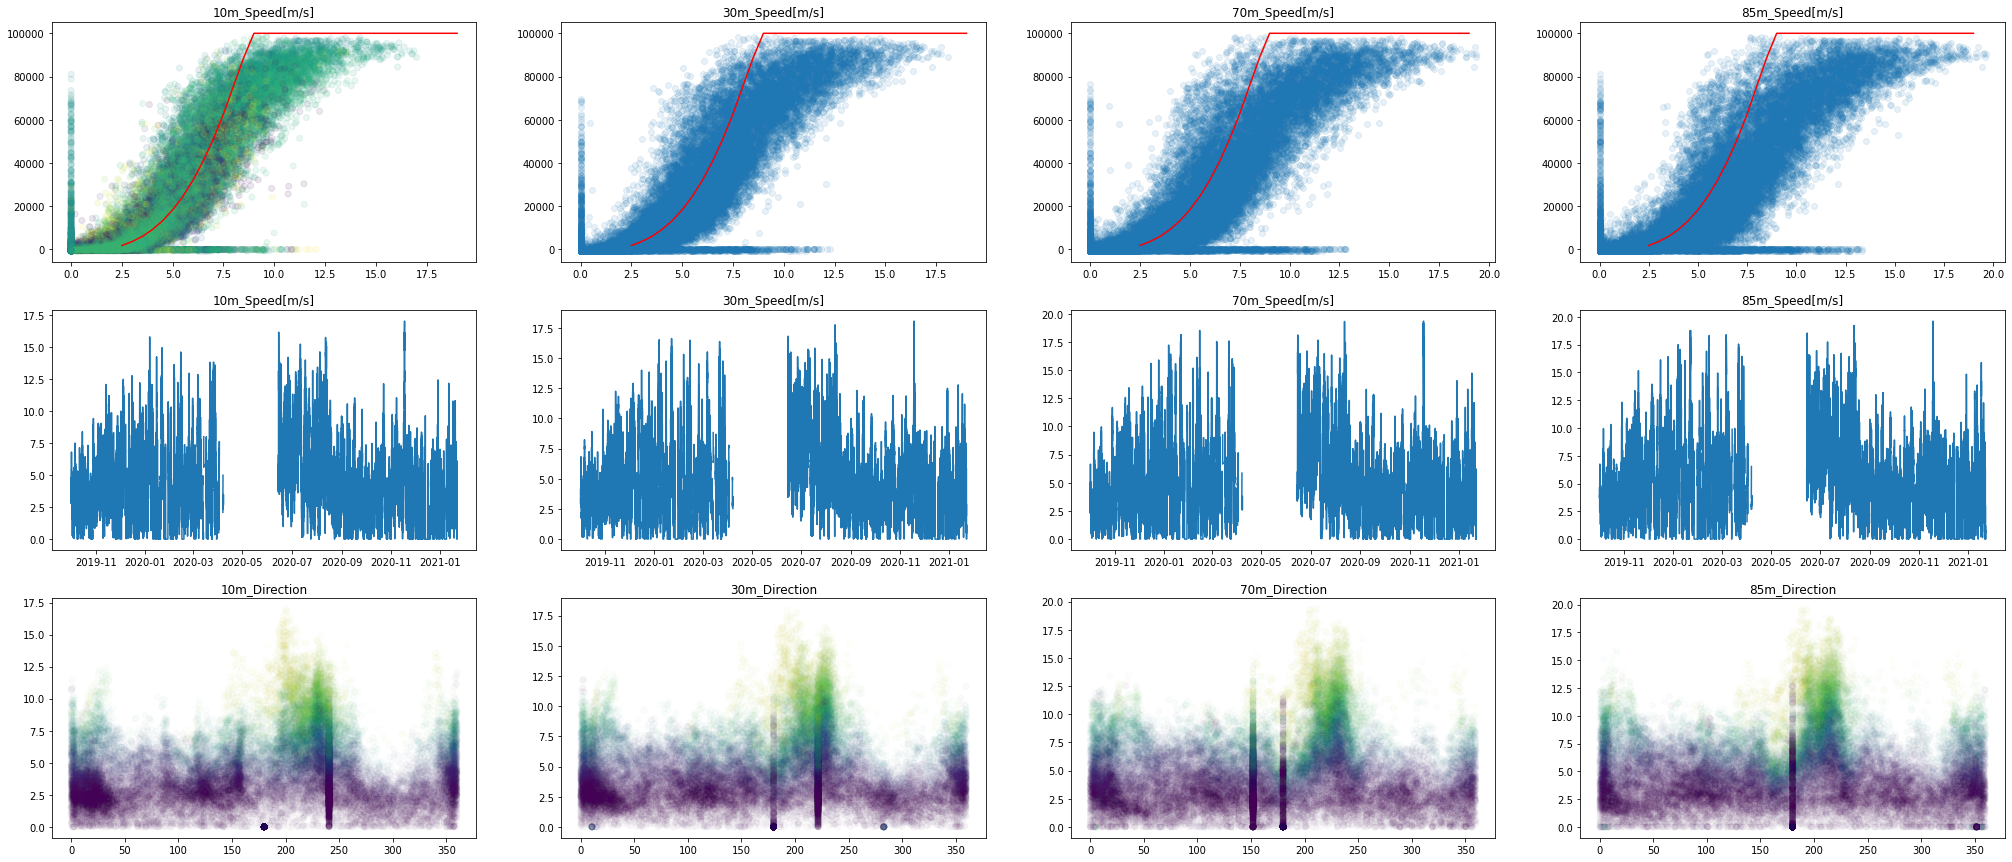

In [27]:
fig, axs = plt.subplots(3, 4,figsize=(35,15))

axs[0,0].scatter(OBS['10m_Speed[m/s]'].values,OBS['Park Power[KW]'],c=OBS['10m_Direction'], cmap='viridis' ,alpha=0.1)
axs[0,0].plot(power_curve['2000']*50,color='red')
axs[0,0].set_title('10m_Speed[m/s]')
axs[0,1].scatter(OBS['30m_Speed[m/s]'].values,OBS['Park Power[KW]'], alpha=0.1)
axs[0,1].plot(power_curve['2000']*50,color='red')
axs[0,1].set_title('30m_Speed[m/s]')
axs[0,2].scatter(OBS['70m_Speed[m/s]'].values,OBS['Park Power[KW]'], alpha=0.1)
axs[0,2].plot(power_curve['2000']*50,color='red')
axs[0,2].set_title('70m_Speed[m/s]')
axs[0,3].scatter(OBS['85m_Speed[m/s]'].values,OBS['Park Power[KW]'], alpha=0.1)
axs[0,3].plot(power_curve['2000']*50,color='red')
axs[0,3].set_title('85m_Speed[m/s]')

axs[1,0].plot(OBS.index,OBS['10m_Speed[m/s]'].values)
axs[1,0].set_title('10m_Speed[m/s]')
axs[1,1].plot(OBS.index,OBS['30m_Speed[m/s]'].values)
axs[1,1].set_title('30m_Speed[m/s]')
axs[1,2].plot(OBS.index,OBS['70m_Speed[m/s]'].values)
axs[1,2].set_title('70m_Speed[m/s]')
axs[1,3].plot(OBS.index,OBS['85m_Speed[m/s]'].values)
axs[1,3].set_title('85m_Speed[m/s]')

axs[2,0].scatter(OBS['10m_Direction'].values,OBS['10m_Speed[m/s]'],c=OBS['Park Power[KW]'], cmap='viridis', alpha=0.02)
axs[2,0].set_title('10m_Direction')
axs[2,1].scatter(OBS['30m_Direction'].values,OBS['30m_Speed[m/s]'],c=OBS['Park Power[KW]'], cmap='viridis', alpha=0.02)
axs[2,1].set_title('30m_Direction')
axs[2,2].scatter(OBS['70m_Direction'].values,OBS['70m_Speed[m/s]'],c=OBS['Park Power[KW]'], cmap='viridis', alpha=0.02)
axs[2,2].set_title('70m_Direction')
axs[2,3].scatter(OBS['85m_Direction'].values,OBS['85m_Speed[m/s]'],c=OBS['Park Power[KW]'], cmap='viridis', alpha=0.02)
axs[2,3].set_title('85m_Direction')



(array([1961., 1041.,  897.,  863.,  805.,  688.,  682.,  741.,  860.,
         982.,  932.,  796.,  808.,  823.,  980.,  845.,  957.,  866.,
        3521., 1910., 2293., 2448., 1731.,  955.,  683.,  600.,  600.,
         603.,  566.,  495.,  436.,  413.,  674.,  995., 1201., 1451.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360.]),
 <a list of 36 Patch objects>)

<Figure size 432x288 with 0 Axes>

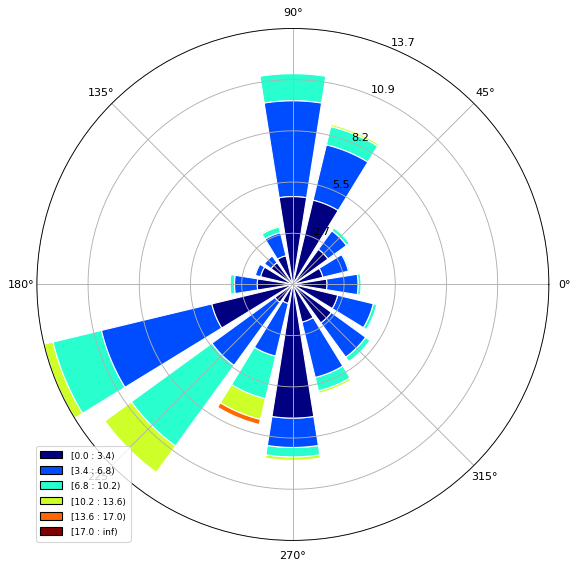

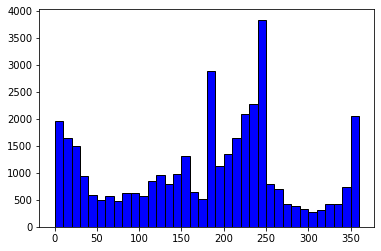

<Figure size 432x288 with 0 Axes>

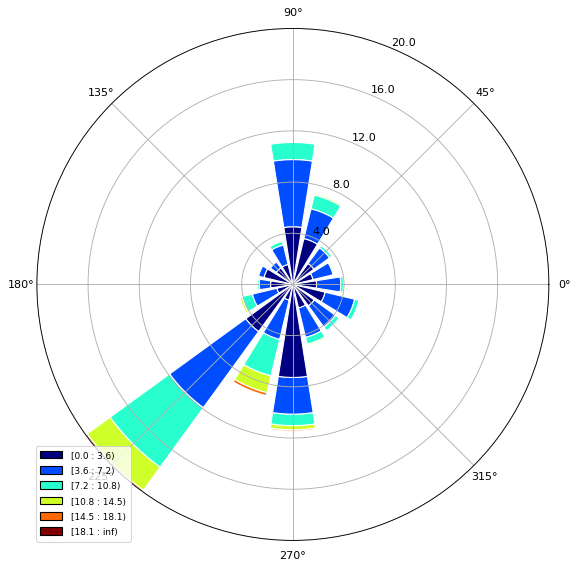

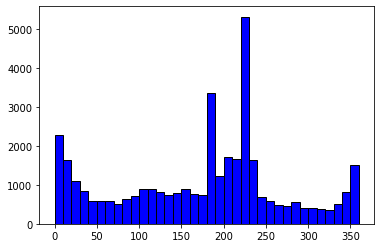

<Figure size 432x288 with 0 Axes>

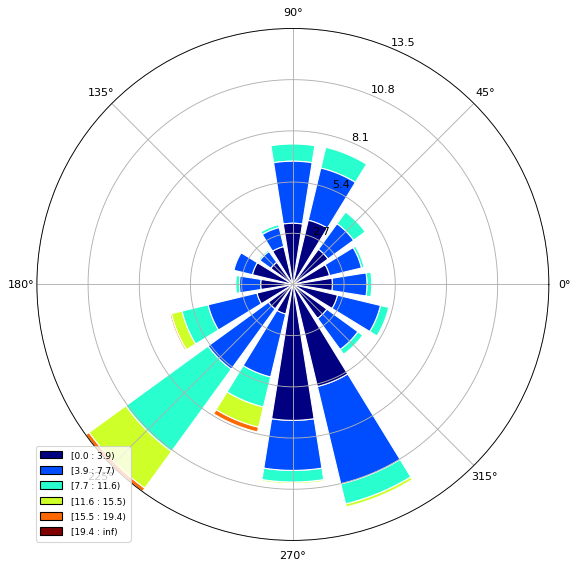

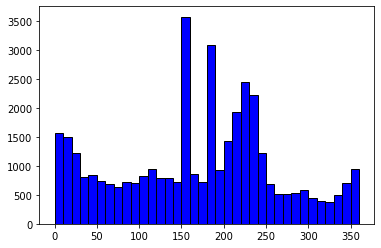

<Figure size 432x288 with 0 Axes>

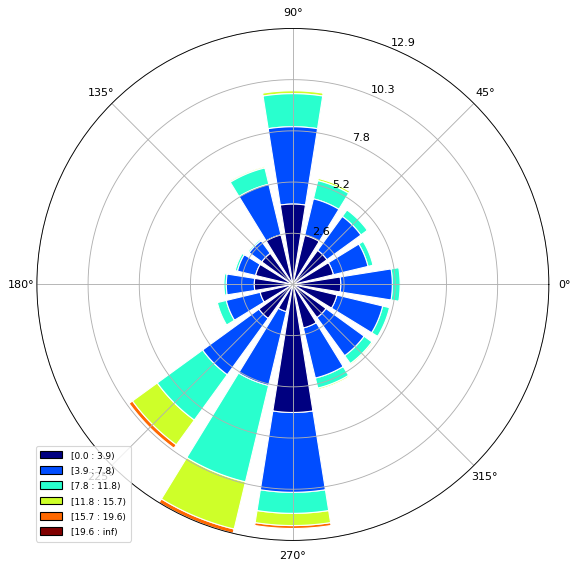

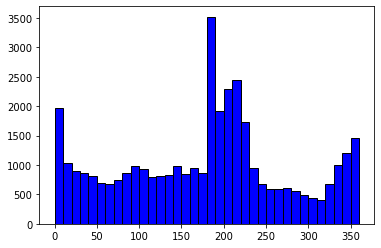

In [12]:
fig = plt.figure()
ax = WindroseAxes.from_ax()
ax.bar(OBS['10m_Direction'], OBS['10m_Speed[m/s]'],normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

fig = plt.figure()
plt.hist(OBS['10m_Direction'], color = 'blue', edgecolor = 'black',bins = int(360/10))

fig = plt.figure()
ax = WindroseAxes.from_ax()
ax.bar(OBS['30m_Direction'], OBS['30m_Speed[m/s]'],normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

fig = plt.figure()
plt.hist(OBS['30m_Direction'], color = 'blue', edgecolor = 'black',bins = int(360/10))

fig = plt.figure()
ax = WindroseAxes.from_ax()
ax.bar(OBS['70m_Direction'], OBS['70m_Speed[m/s]'],normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

fig = plt.figure()
plt.hist(OBS['70m_Direction'], color = 'blue', edgecolor = 'black',bins = int(360/10))

fig = plt.figure()
ax = WindroseAxes.from_ax()
ax.bar(OBS['85m_Direction'], OBS['85m_Speed[m/s]'],normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

fig = plt.figure()
plt.hist(OBS['85m_Direction'], color = 'blue', edgecolor = 'black',bins = int(360/10))

Text(0.5, 1.0, 'ECMWF: Error_10m')

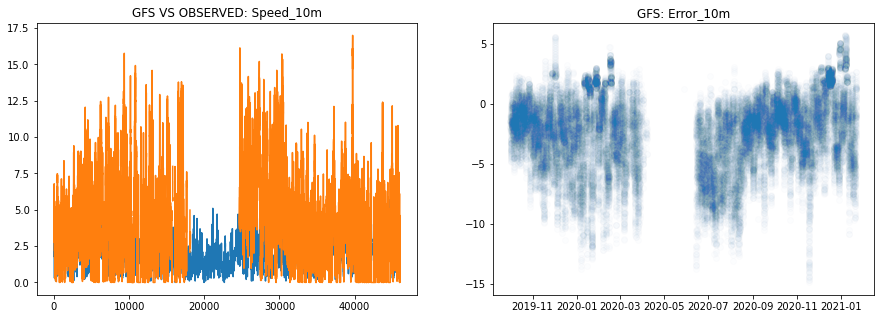

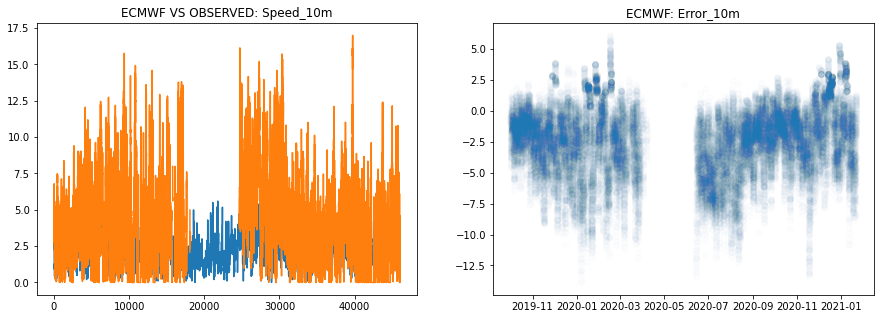

In [13]:
## comparing ECMWF and GFS

ECMWF['Error_10m']=ECMWF['10m_Speed[m/s]']-OBS['10m_Speed[m/s]']
GFS['Error_10m']=GFS['10m_Speed[m/s]']-OBS['10m_Speed[m/s]']

fig, axs = plt.subplots(1, 2,figsize=(15,5))

axs[0].plot(GFS['10m_Speed[m/s]'].values)
axs[0].plot(OBS['10m_Speed[m/s]'].values)
axs[0].set_title('GFS VS OBSERVED: Speed_10m')
axs[1].scatter(GFS.index,GFS['Error_10m'].values,alpha=0.01)
axs[1].set_title('GFS: Error_10m')


fig, axs = plt.subplots(1, 2,figsize=(15,5))

axs[0].plot(ECMWF['10m_Speed[m/s]'].values)
axs[0].plot(OBS['10m_Speed[m/s]'].values)
axs[0].set_title('ECMWF VS OBSERVED: Speed_10m')
axs[1].scatter(ECMWF.index,ECMWF['Error_10m'].values,alpha=0.01)
axs[1].set_title('ECMWF: Error_10m')


Dataset conclusions:
- NWP from ECMWF and GFS will allow a more complete analysis of the forecast methods, explaining the importance of the NWP.
- Information from more high levels can be used to generate more data extrapolating it to the Windfarm heigh level.
-Missing period for NWP and missmatch of observation and NWP data (starting dates are different).
- Difficult location (mountains) makes the weather prediction more inaccuarate. It could be convinient to have a benchmark for this test case.

Improvements for the final project:
- To have 3 dataset from 3 different Wind Farms and different terrain complexities.
- 3 Years of data to have a better input from seasonal features.
- Include forecast benchmarks.
